# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/my_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_data = pd.DataFrame({"City": cities})

In [4]:
weather_data['Latitude'] = ""
weather_data['Longitude'] = ""
weather_data['Max Temperature'] = ""
weather_data['Humidity'] = ""
weather_data['Cloudiness'] = ""
weather_data['Wind Speed'] = ""
weather_data['Country'] = ""
weather_data['Date'] = ""

In [5]:
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

city_counter = 1

for index, row in weather_data.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    city = row['City']
    response = requests.get(query_url + city).json()
  
    print(f"Processing Record {city_counter} of Set 1 | {city}")
    city_counter += 1    
    
    try:
        weather_data.loc[index, "Latitude"] = response['coord']['lat']
        weather_data.loc[index, "Longitude"] = response['coord']['lon']
        weather_data.loc[index, "Max Temperature"] = response['main']['temp_max']
        weather_data.loc[index, "Humidity"] = response['main']['humidity']
        weather_data.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_data.loc[index, "Wind Speed"] = response['wind']['speed']
        weather_data.loc[index, "Country"] = response['sys']['country']
        weather_data.loc[index, "Date"] = response['dt']
                
    except (KeyError, IndexError): 
        print("City not found. Skipping....")
        
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping....
Processing Record 3 of Set 1 | lagunas
Processing Record 4 of Set 1 | plouzane
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | bambous virieux
Processing Record 13 of Set 1 | san onofre
Processing Record 14 of Set 1 | udala
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | benghazi
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | barrow
Processi

Processing Record 182 of Set 1 | toulepleu
City not found. Skipping....
Processing Record 183 of Set 1 | mar del plata
Processing Record 184 of Set 1 | aflu
City not found. Skipping....
Processing Record 185 of Set 1 | severo-yeniseyskiy
Processing Record 186 of Set 1 | lebu
Processing Record 187 of Set 1 | artyk
City not found. Skipping....
Processing Record 188 of Set 1 | tabas
Processing Record 189 of Set 1 | severo-kurilsk
Processing Record 190 of Set 1 | nouadhibou
Processing Record 191 of Set 1 | afmadu
City not found. Skipping....
Processing Record 192 of Set 1 | arraial do cabo
Processing Record 193 of Set 1 | la asuncion
Processing Record 194 of Set 1 | mahanoro
Processing Record 195 of Set 1 | korla
Processing Record 196 of Set 1 | chernyshevskiy
Processing Record 197 of Set 1 | mecca
Processing Record 198 of Set 1 | cherskiy
Processing Record 199 of Set 1 | bethel
Processing Record 200 of Set 1 | saint-francois
Processing Record 201 of Set 1 | acapulco
Processing Record 202 

Processing Record 365 of Set 1 | batagay
Processing Record 366 of Set 1 | kirakira
Processing Record 367 of Set 1 | gat
Processing Record 368 of Set 1 | egvekinot
Processing Record 369 of Set 1 | kasongo-lunda
Processing Record 370 of Set 1 | guane
Processing Record 371 of Set 1 | walvis bay
Processing Record 372 of Set 1 | san vicente
Processing Record 373 of Set 1 | jaramana
City not found. Skipping....
Processing Record 374 of Set 1 | houma
Processing Record 375 of Set 1 | tumannyy
City not found. Skipping....
Processing Record 376 of Set 1 | havre-saint-pierre
Processing Record 377 of Set 1 | xiongzhou
Processing Record 378 of Set 1 | carnarvon
Processing Record 379 of Set 1 | lazarev
Processing Record 380 of Set 1 | amahai
Processing Record 381 of Set 1 | maltahohe
Processing Record 382 of Set 1 | kiama
Processing Record 383 of Set 1 | camocim
Processing Record 384 of Set 1 | iquique
Processing Record 385 of Set 1 | igrim
Processing Record 386 of Set 1 | shingu
Processing Record 3

Processing Record 549 of Set 1 | xiongshi
City not found. Skipping....
Processing Record 550 of Set 1 | newport
Processing Record 551 of Set 1 | sao francisco do sul
Processing Record 552 of Set 1 | natal
Processing Record 553 of Set 1 | marrakesh
Processing Record 554 of Set 1 | millau
Processing Record 555 of Set 1 | eyl
Processing Record 556 of Set 1 | kegayli
City not found. Skipping....
Processing Record 557 of Set 1 | sibenik
Processing Record 558 of Set 1 | karabulak
Processing Record 559 of Set 1 | evensk
Processing Record 560 of Set 1 | berja
Processing Record 561 of Set 1 | arkhara
Processing Record 562 of Set 1 | carutapera
Processing Record 563 of Set 1 | armacao dos buzios
City not found. Skipping....
Processing Record 564 of Set 1 | silver city
Processing Record 565 of Set 1 | pimenta bueno
Processing Record 566 of Set 1 | jensen beach
Processing Record 567 of Set 1 | mercedes
Processing Record 568 of Set 1 | hirara
Processing Record 569 of Set 1 | shimoda
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
compression_opts = dict(method='zip',
                        archive_name='my_cities.csv')  
weather_data.to_csv('my_cities.zip', index=False,
          compression=compression_opts)  

In [7]:
weather_data.count()

City               624
Latitude           624
Longitude          624
Max Temperature    624
Humidity           624
Cloudiness         624
Wind Speed         624
Country            624
Date               624
dtype: int64

In [8]:
seconds = weather_data["Date"]
seconds = time.ctime()
weather_data["Date"] = seconds

In [9]:
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,48,70,6,3.89,AU,Thu Jul 23 11:45:03 2020
1,illoqqortoormiut,,,,,,,,Thu Jul 23 11:45:03 2020
2,lagunas,-5.23,-75.68,88.99,55,85,2.55,PE,Thu Jul 23 11:45:03 2020
3,plouzane,48.38,-4.62,71.6,49,26,8.05,FR,Thu Jul 23 11:45:03 2020
4,bluff,-46.6,168.33,39,83,83,3,NZ,Thu Jul 23 11:45:03 2020
...,...,...,...,...,...,...,...,...,...
619,bolungarvik,,,,,,,,Thu Jul 23 11:45:03 2020
620,buala,-8.14,159.59,81.23,81,99,10.38,SB,Thu Jul 23 11:45:03 2020
621,poshekhonye,58.5,39.14,60.75,72,66,9.93,RU,Thu Jul 23 11:45:03 2020
622,unye,,,,,,,,Thu Jul 23 11:45:03 2020


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_data["Latitude"] = pd.to_numeric(weather_data["Latitude"], errors='coerce')
weather_data["Max Temperature"] = pd.to_numeric(weather_data["Max Temperature"], errors='coerce')
weather_data["Humidity"] = pd.to_numeric(weather_data["Humidity"], errors='coerce')
weather_data["Cloudiness"] = pd.to_numeric(weather_data["Cloudiness"], errors='coerce')
weather_data["Wind Speed"] = pd.to_numeric(weather_data["Wind Speed"], errors='coerce')

In [11]:
weather_data.dtypes

City                object
Latitude           float64
Longitude           object
Max Temperature    float64
Humidity           float64
Cloudiness         float64
Wind Speed         float64
Country             object
Date                object
dtype: object

In [12]:
weather_data_humidity = weather_data.loc[weather_data["Humidity"] > 100]
weather_data_humidity

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [13]:
def global_scatter(x_values, y_values, ylabel):
    t = y_values
    plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)

## Latitude vs. Temperature Plot

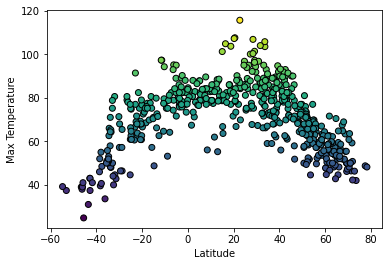

In [14]:
x_values = weather_data['Latitude']
y_values = weather_data['Max Temperature']
plt.title = ("City Latitude vs Max Temperature (7/23/2020)")
global_scatter(x_values, y_values, "Max Temperature")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_temperature.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***global_scatter*** to create a visualization of global latitude versus global maximum temperatures. This function generates a scatter plot based on the variables present when called. For this plot I compared the columns "City Latitude" to "Maximum Temperature" from the ***weather_data*** DataFrame.
<br>**Observation:** We can see that the highest range of maximum temperatures falls between 20 and 40 degrees latitude. This tells us that the Northern Hemisphere has the highest range of maximum temperatures.

## Latitude vs. Humidity Plot

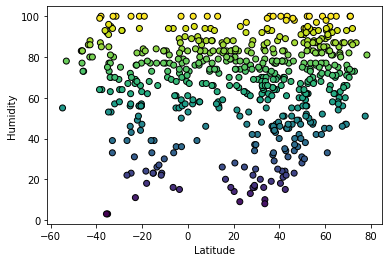

In [15]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.title = ("City Latitude vs Humidity (7/23/2020)")
global_scatter(x_values, y_values, "Humidity")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_humidity.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***global_scatter*** to create a visualization of global latitude versus global humidity. This function generates a scatter plot based on the variables present when called. For this plot I compared the columns "City Latitude" to "Humidity" from the ***weather_data*** DataFrame.
<br>**Observation:** There is a similar range of humidity in both the Northern and Southern Hemispheres. 

## Latitude vs. Cloudiness Plot

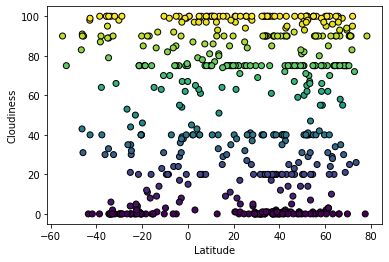

In [16]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.title = ("City Latitude vs Cloudiness (7/23/2020)")
global_scatter(x_values, y_values, "Cloudiness")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_cloudiness.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***global_scatter*** to create a visualization of global latitude versus global cloudiness. This function generates a scatter plot based on the variables present when called. For this plot I compared the columns "City Latitude" to "Cloudiness" from the ***weather_data*** DataFrame.
<br>**Observation:** here is a similar range of cloudiness in both the Northern and Southern Hemispheres. 

## Latitude vs. Wind Speed Plot

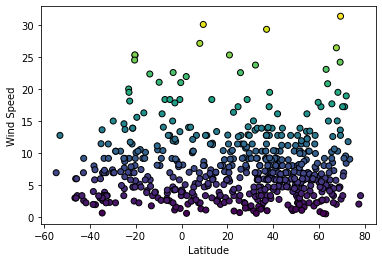

In [17]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.title = ("City Latitude vs Wind Speed (7/23/2020)")
global_scatter(x_values, y_values, "Wind Speed")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\latitude_vs_wind_speed.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***global_scatter*** to create a visualization of global latitude versus global wind speed. This function generates a scatter plot based on the variables present when called. For this plot I compared the columns "City Latitude" to "Wind Speed" from the ***weather_data*** DataFrame.
<br>**Observation:** We can see that the highest range of wind speed falls between roughly 10 and 70 degrees latitude. This tells us that the Northern Hemisphere has the highest range of wind speeds.

## Linear Regression

In [18]:
northern_hemisphere = weather_data.loc[(weather_data["Latitude"] >= 0)]
northern_hemisphere

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
3,plouzane,48.38,-4.62,71.60,49.0,26.0,8.05,FR,Thu Jul 23 11:45:03 2020
6,aklavik,68.22,-135.01,51.80,66.0,75.0,10.29,CA,Thu Jul 23 11:45:03 2020
8,talnakh,69.49,88.4,50.00,66.0,93.0,31.32,RU,Thu Jul 23 11:45:03 2020
9,qaanaaq,77.48,-69.36,48.74,51.0,0.0,2.04,GL,Thu Jul 23 11:45:03 2020
10,cabo san lucas,22.89,-109.91,84.20,74.0,5.0,3.36,MX,Thu Jul 23 11:45:03 2020
...,...,...,...,...,...,...,...,...,...
615,drezdenko,52.84,15.83,68.20,50.0,70.0,5.99,PL,Thu Jul 23 11:45:03 2020
616,senftenberg,51.52,14.02,71.01,51.0,71.0,1.99,DE,Thu Jul 23 11:45:03 2020
617,portree,57.41,-6.19,59.00,88.0,80.0,5.99,GB,Thu Jul 23 11:45:03 2020
621,poshekhonye,58.50,39.14,60.75,72.0,66.0,9.93,RU,Thu Jul 23 11:45:03 2020


In [19]:
southern_hemisphere = weather_data.loc[(weather_data["Latitude"] < 0)]
southern_hemisphere

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,48.00,70.0,6.0,3.89,AU,Thu Jul 23 11:45:03 2020
2,lagunas,-5.23,-75.68,88.99,55.0,85.0,2.55,PE,Thu Jul 23 11:45:03 2020
4,bluff,-46.60,168.33,39.00,83.0,83.0,3.00,NZ,Thu Jul 23 11:45:03 2020
5,hermanus,-34.42,19.23,66.00,73.0,0.0,2.59,ZA,Thu Jul 23 11:45:03 2020
7,geraldton,-28.77,114.6,46.40,93.0,0.0,10.29,AU,Thu Jul 23 11:45:03 2020
...,...,...,...,...,...,...,...,...,...
600,moerai,-22.43,-151.33,71.62,76.0,2.0,11.70,PF,Thu Jul 23 11:45:03 2020
601,tautira,-17.73,-149.15,75.20,78.0,90.0,4.70,PF,Thu Jul 23 11:45:03 2020
603,booue,-0.09,11.94,83.89,61.0,67.0,3.96,GA,Thu Jul 23 11:45:03 2020
618,dunedin,-45.87,170.5,41.00,73.0,31.0,5.99,NZ,Thu Jul 23 11:45:03 2020


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
def scatters(x_values, y_values, ylabel, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    t = y_values
    plt.scatter(x_values, y_values, c=t, cmap='viridis', edgecolors='black')
    plt.plot(x_values,regress_values,"r-") 
    plt.annotate(line_eq, coordinates, fontsize=14, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)

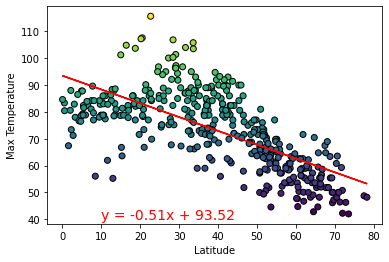

In [21]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Max Temperature']
scatters(x_values, y_values, "Max Temperature", (10,40))
plt.title = ("City Latitude vs Max Temperature: Northern Hemisphere (7/23/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_temperature.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***scatters*** to create a visualization of latitude versus maximum temperatures in the Northern Hemisphere, and to show the linear regression. This function generates a scatter plot based on the variables present when called. It also calculates and plots the linear regression. For this plot I compared the columns "City Latitude" to "Maximum Temperature" from the ***northern_hemisphere*** DataFrame.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

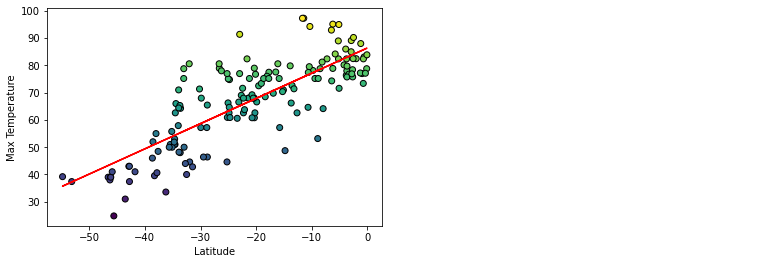

In [22]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Max Temperature']
scatters(x_values, y_values, "Max Temperature", (50,40))
plt.title = ("City Latitude vs Max Temperature: Southern Hemisphere (7/23/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_temperature.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***scatters*** to create a visualization of latitude versus maximum temperatures in the Southern Hemisphere, and to show the linear regression. This function generates a scatter plot based on the variables present when called. It also calculates and plots the linear regression. For this plot I compared the columns "City Latitude" to "Maximum Temperature" from the ***southern_hemisphere*** DataFrame.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

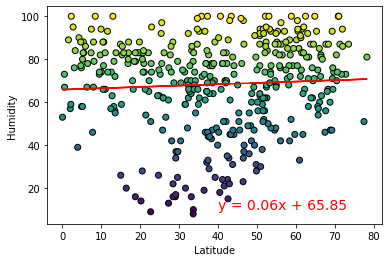

In [23]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
scatters(x_values, y_values, "Humidity", (40,10))
plt.title = ("City Latitude vs Humidity: Northern Hemisphere (7/23/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_humidity.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***scatters*** to create a visualization of latitude versus humidity in the Northern Hemisphere, and to show the linear regression. This function generates a scatter plot based on the variables present when called. It also calculates and plots the linear regression. For this plot I compared the columns "City Latitude" to "Humidity" from the ***northern_hemisphere*** DataFrame.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

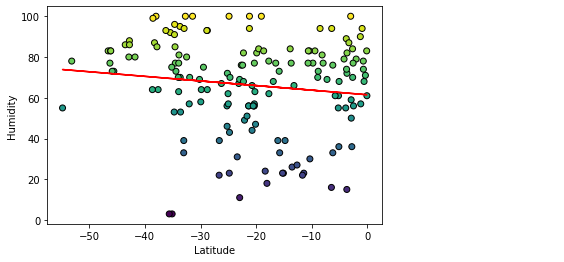

In [24]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
scatters(x_values, y_values, "Humidity", (10,40))
plt.title = ("City Latitude vs Humidity: Southern Hemisphere (7/23/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_humidity.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***scatters*** to create a visualization of latitude versus humidity in the Southern Hemisphere, and to show the linear regression. This function generates a scatter plot based on the variables present when called. It also calculates and plots the linear regression. For this plot I compared the columns "City Latitude" to "Humidity" from the ***southern_hemisphere*** DataFrame.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

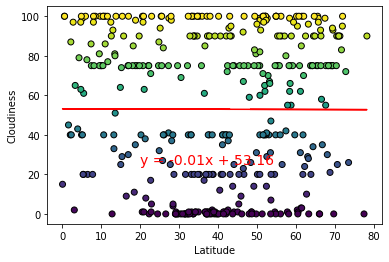

In [25]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Cloudiness']
scatters(x_values, y_values, "Cloudiness", (20,25))
plt.title = ("City Latitude vs Cloudiness: Northern Hemisphere (7/23/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_cloudiness.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***scatters*** to create a visualization of latitude versus cloudiness in the Northern Hemisphere, and to show the linear regression. This function generates a scatter plot based on the variables present when called. It also calculates and plots the linear regression. For this plot I compared the columns "City Latitude" to "Cloudiness" from the ***northern_hemisphere*** DataFrame.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

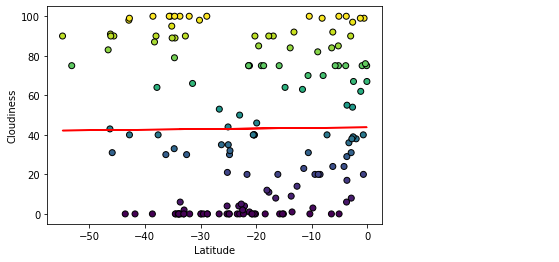

In [26]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Cloudiness']
scatters(x_values, y_values, "Cloudiness", (10,40))
plt.title = ("City Latitude vs Cloudiness: Southern Hemisphere (7/23/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_cloudiness.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***scatters*** to create a visualization of latitude versus cloudiness in the Southern Hemisphere, and to show the linear regression. This function generates a scatter plot based on the variables present when called. It also calculates and plots the linear regression. For this plot I compared the columns "City Latitude" to "Cloudiness" from the ***southern_hemisphere*** DataFrame.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

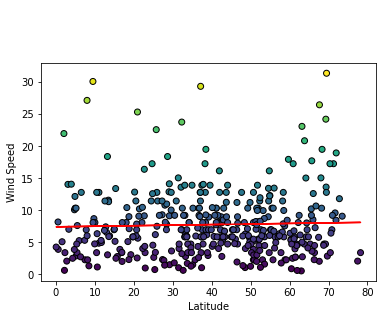

In [27]:
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Wind Speed']
scatters(x_values, y_values, "Wind Speed", (10,40))
plt.title = ("City Latitude vs Wind Speed: Northern Hemisphere (7/23/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\northern_latitude_vs_wind_speed.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***scatters*** to create a visualization of latitude versus maximum wind speeds in the Northern Hemisphere, and to show the linear regression. This function generates a scatter plot based on the variables present when called. It also calculates and plots the linear regression. For this plot I compared the columns "City Latitude" to "Wind Speed" from the ***northern_hemisphere*** DataFrame.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

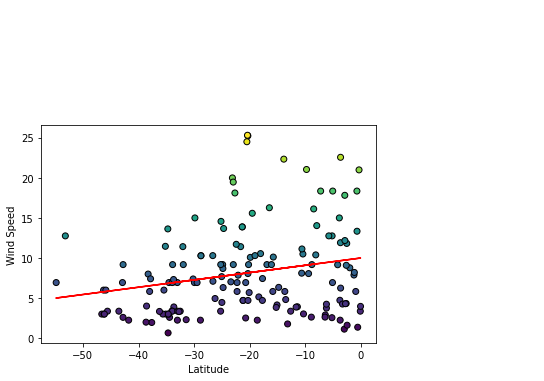

In [29]:
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Wind Speed']
scatters(x_values, y_values, "Wind Speed", (10,40))
plt.title = ("City Latitude vs Wind Speed: Southern Hemisphere (7/23/2020)")
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_06_Python_APIs\\Homework\\WeatherPy\\Images\\southern_latitude_vs_wind_speed.png")
plt.show()

**Summary of code:** in this plot, I used a function called ***scatters*** to create a visualization of latitude versus maximum wind speeds in the Southern Hemisphere, and to show the linear regression. This function generates a scatter plot based on the variables present when called. It also calculates and plots the linear regression. For this plot I compared the columns "City Latitude" to "Wind Speed" from the ***southern_hemisphere*** DataFrame.

## Analysis
<br>1. The Northern Hemisphere has a higher maximum temperature than the Southern Hemisphere. This can be seen in the two scatter plots comparing latitude to maximum temperature in the Northern and Southern Hemispheres, respectively.
<br>2. The Northen Hemisphere shows a greater range of values when it comes to cloudiness. This can be seen in the two scatter plots comparing latitude to cloudiness in the Northern and Southern Hemispheres, respectively.
<br>3. Ranges of humidity are not impacted by latitude. Both hemisphers show a similar range of values. This can be seen in the two scatter plots comparing latitude to humidity in the Northern and Southern Hemispheres, respectively. 

If you wanted to use this data as a factor for the placement of a new business location, the southern hemisphere will have lower maximum temperatures and less cloudiness, which tells us the weather in general may be more stable. This could assist with obtaining lower insurance premiums, attracting tourist clientele, and the recruiting and retention of qualified personnel.